In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [30]:
start = np.array([[2, 3], [1, 4],[1, 4],[1, 4],[1, 4],[1, 4],[1, 4],[1, 4],[1, 4],[1, 4]])

In [31]:
def sample(elements, n):
    samples = []
    while(len(samples) < n):
        samples.append(random.choice(elements))
    return np.array(samples)

In [32]:
samples = sample(start, 5)
print(samples)

[[1 4]
 [1 4]
 [1 4]
 [1 4]
 [1 4]]


In [33]:
def sample_uniform(elements, n=1):
    # remove duplicates
    elements_unique = np.unique(elements, axis=0)
    return sample(elements_unique, n)

In [34]:
samples_uni = sample_uniform(start, 10)
print(samples_uni)

[[1 4]
 [1 4]
 [2 3]
 [2 3]
 [1 4]
 [2 3]
 [2 3]
 [2 3]
 [1 4]
 [1 4]]


In [120]:
def transition(state, action):
    noise = np.random.normal(0, 0.01)
    return state + action# + noise

# T_B: how many actions should be performed from one start sample
# M:   how many starts to put in the replay buffer


def sample_nearby(elements, N_new, cov=0.1, T_B=3, M=30):
    starts = np.array(elements)
    set_count = 0
    colors = ["blue", "orange", "green", "black"]
    while(len(starts) < M):
        s = sample_uniform(starts);
        plt.scatter(s[0,0], s[0,1], marker="<", s=100)# c="blue")
        trajectory = np.array(s)
        for t in range(0, T_B):
            a_t = np.random.normal(0, cov, size=2)
            s = transition(s, a_t)
            
            plt.scatter(s[0,0], s[0,1], marker="x", s=25, c=colors[set_count])
            trajectory = np.append(trajectory, s, axis=0)
            starts = np.append(starts, s, axis=0)
        # print(trajectory.shape)
        plt.plot(trajectory[:,0], trajectory[:,1], linewidth=2)
        set_count += 1 
    starts_new = sample(starts, N_new)
    return starts_new

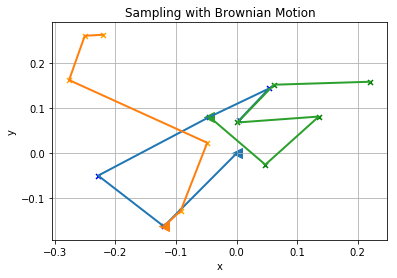

In [122]:
start = np.array([[0, 0]])

nearby_samples = sample_nearby(start, 15, T_B=5, M=16)
# print(nearby_samples)

plt.title("Sampling with Brownian Motion")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("images/sampling_with_brownian_motion.pdf")
plt.show()
# plt.xlim(-0.2, 0.2)
# plt.ylim(-0.2, 0.2)


## only 3 directories
## startpunkt andere Form
## Punkte entlang einer Trajektorie gleichfarbig
## Erster Punkt einer Trajektorie hervorheben


In [ ]:
def train_policy(rho, policy):
    
    return policy

In [ ]:
############################################
###### Algorithm 1: Policy Training ########
############################################
#
#   Input:  policy, s_g, rho_0, N_new, N_old, R_min, R_max, Iter
#   policy: initial policy
#   s_g:    goal state
#   rho_0:  initial start distribution
#   N_new:  number of new starts
#   N_old:  number of old starts
#   R_min:  TODO
#   R_max:  TODO
#   Iter:   TODO
#
#
############################################
def policy_training(policy, s_g, rho_0, N_new, N_old, R_min, R_max, Iter, batch_size = 64):
    starts_old = [goal_state] # TODO: adapt to more than one goal state
    start_rews = [[goal_state, 1]]

    for i in range(Iter):
        starts = sample_nearby(starts, N_new)
        starts.append(sample(starts_old, N_old))
        rho = sample_uniform(starts, batch_size) # TODO: function that uniformly samples from all valid starts
        policy, start_rews = train_policy(rho, policy)
        starts = select(start_rews, R_min, R_max)
        starts_old.append(starts)

    return policy